In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("titanic_train.csv")
test = pd.read_csv("titanic_test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot: >

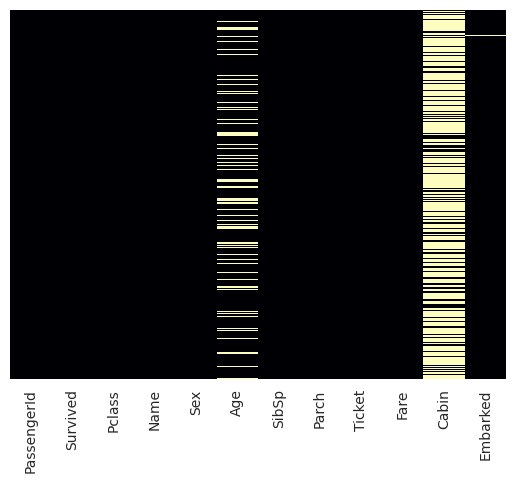

In [5]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='magma')

In [6]:
sns.set_style('whitegrid')

<AxesSubplot: xlabel='Survived', ylabel='count'>

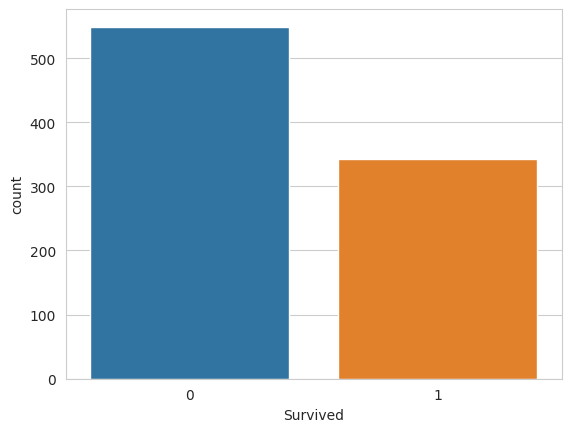

In [7]:
sns.countplot(x='Survived', data=train)

<AxesSubplot: xlabel='Survived', ylabel='count'>

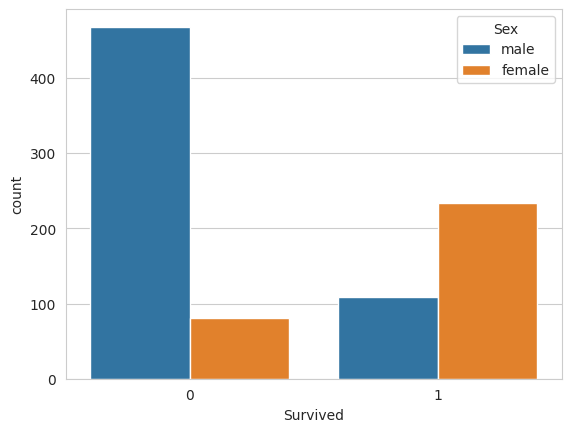

In [8]:
sns.countplot(x='Survived', data=train, hue='Sex')

<AxesSubplot: xlabel='Survived', ylabel='count'>

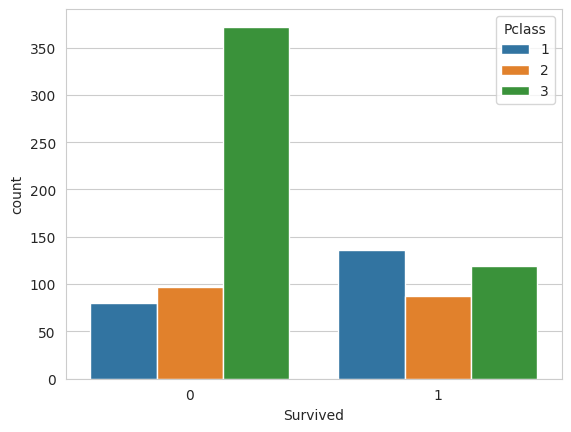

In [9]:
sns.countplot(x='Survived', data=train, hue='Pclass')

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot: xlabel='Age', ylabel='Count'>

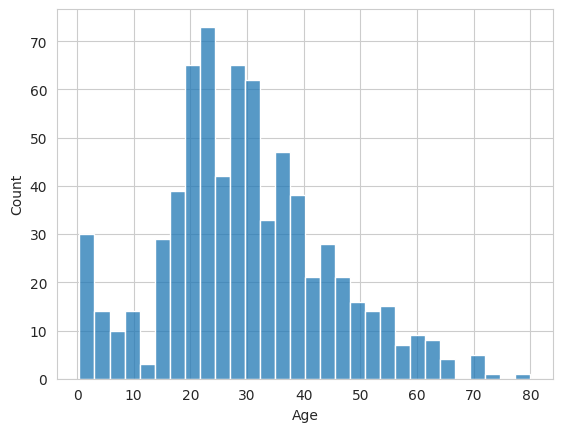

In [11]:
sns.histplot(train['Age'].dropna(), bins=30)

<AxesSubplot: xlabel='SibSp', ylabel='count'>

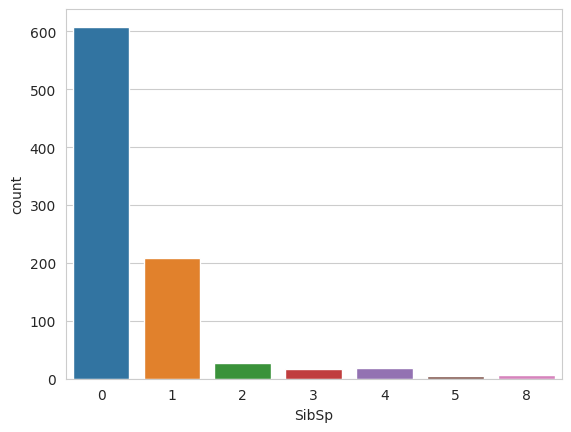

In [12]:
sns.countplot(data=train, x='SibSp')

<AxesSubplot: xlabel='Fare', ylabel='Count'>

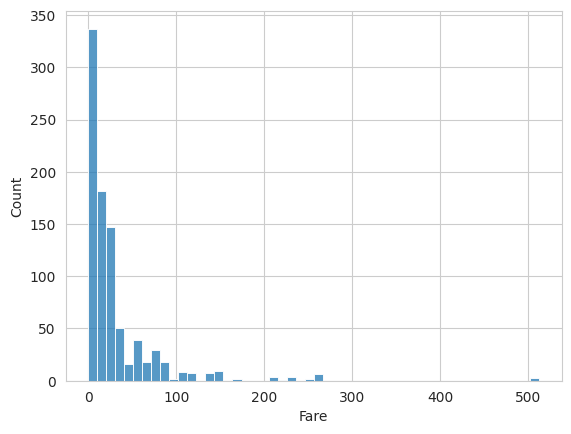

In [13]:
sns.histplot(data=train, x='Fare', bins=50)

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

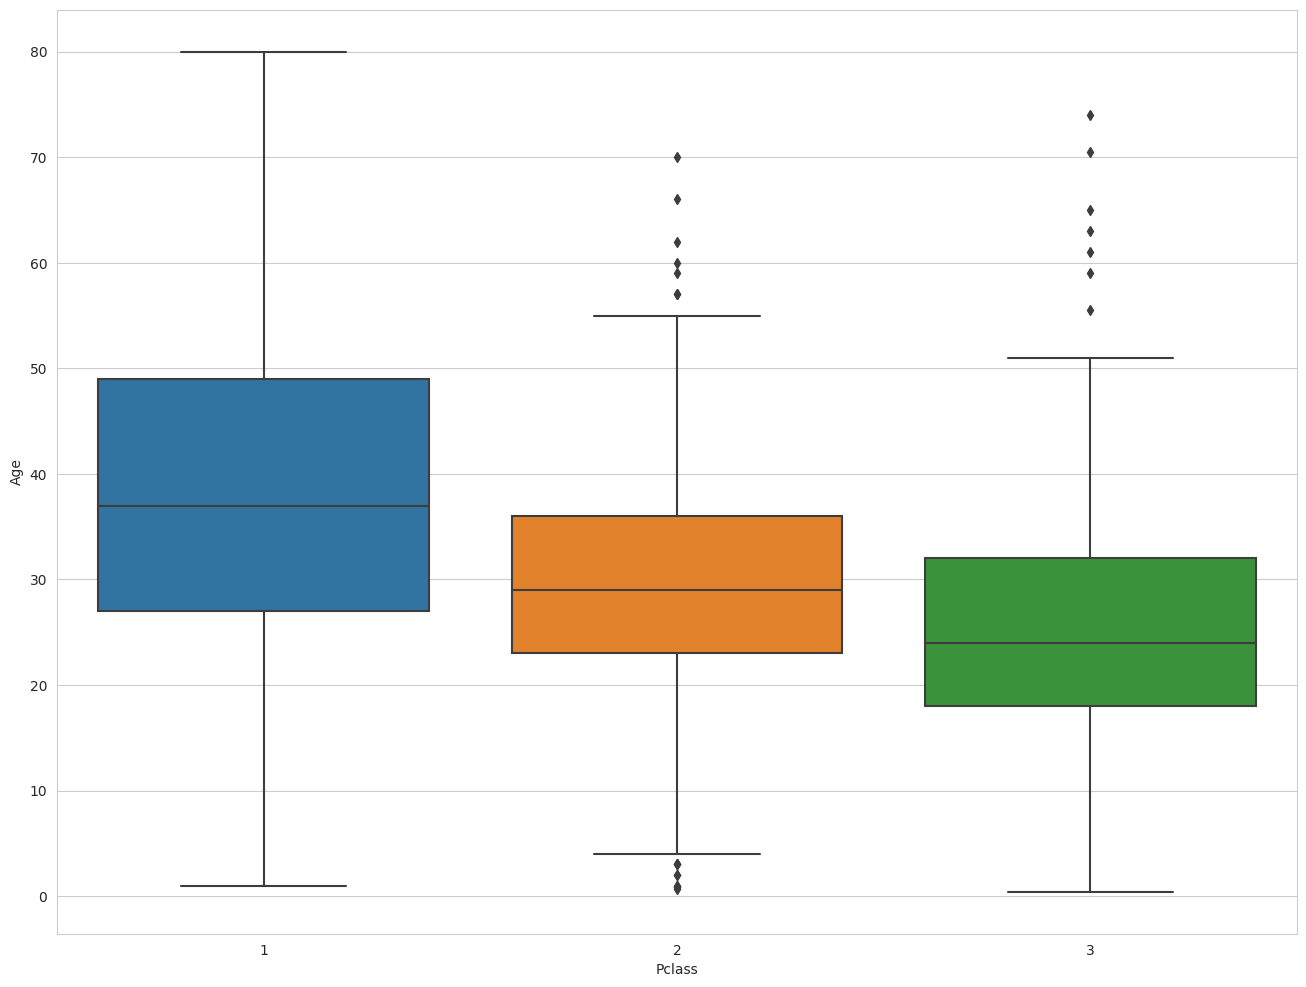

In [14]:
plt.figure(figsize=(16, 12))
sns.boxplot(data=train, x='Pclass', y='Age')

In [15]:
print('Train:', train.groupby(['Sex', 'Pclass'])['Age'].median())
train['Age'] = train['Age'].fillna(train.groupby(['Sex', 'Pclass'])['Age'].transform('median'))

Train: Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64


In [16]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<AxesSubplot: >

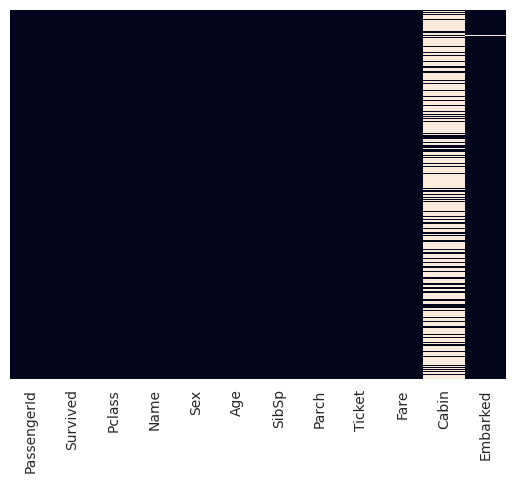

In [17]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

In [18]:
train.drop(columns='Cabin', inplace=True)

<AxesSubplot: >

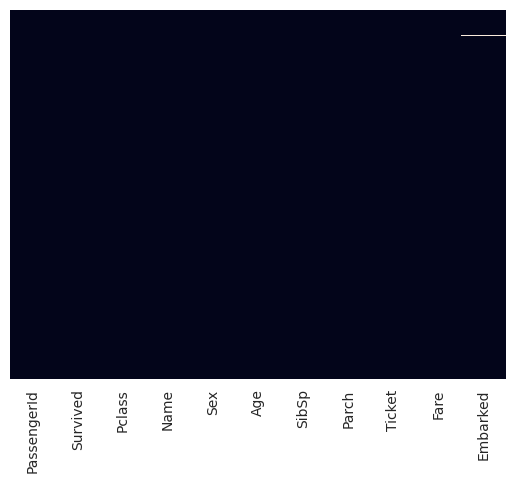

In [19]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

In [20]:
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

<AxesSubplot: >

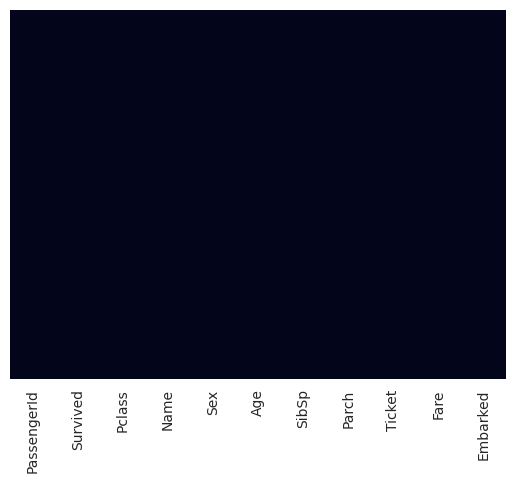

In [21]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

In [22]:
# Categorical features to dummies

In [26]:
dummies = ['Sex','Embarked']

In [27]:
dummies_df = pd.get_dummies(train[dummies], drop_first=True)

In [28]:
dummies_df

,Sex_male,Embarked_Q,Embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1
...,...,...,...
886,1,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [29]:
train = pd.concat([train, dummies_df], axis=1)

In [30]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [31]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [32]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [33]:
train.drop(['PassengerId'], axis=1, inplace=True)

In [34]:
train.tail()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
886,0,2,27.0,0,0,13.00,1,0,1
887,1,1,19.0,0,0,30.00,0,0,1
888,0,3,21.5,1,2,23.45,0,0,1
889,1,1,26.0,0,0,30.00,1,0,0
890,0,3,32.0,0,0,7.75,1,1,0


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [36]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
lr = LogisticRegression()

In [40]:
lr.fit(X_train, y_train)

/home/mardzien/PycharmProjects/DS and ML Bootcamp/venv/lib64/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
predictions = lr.predict(X_test)

In [46]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       157
           1       0.81      0.73      0.77       111

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



In [47]:
confusion_matrix(y_test, predictions)

array([[138,  19],
       [ 30,  81]])